### Introduction

In this Jupyter Notebook, we aim to clean and prepare a dataset containing information about data science job posts from Glassdoor.It encompasses various industries, job titles,  estimated salaries, type of ownerships, locations, etc. Our  goal is to perform insightful analysis on the cleaned dataset.
The primary aim is to uncover key insights into the job market and explore aspects such as salary estimates, company sizes, revenue etc.

It aims for find some pattern to answer the follwing questions: 
- Are there certain industries or sectors with high demand for data science roles? and what are the most common job titles required?
- Do company size and revenue levels influence salary estimations among the companies in the dataset?
- Are there geographic regions where the open positions are more prevalent?

In [58]:
import numpy as np
import pandas as pd
import os
import re
from matplotlib import pyplot as plt
import seaborn as sns
from functions import *

In [59]:
path='../data/raw/Uncleaned_DS_jobs.csv'
df = pd.read_csv(path)

### Initial Analysis

We will begin our analysis by examining the current state of the uncleaned dataset. This initial exploration will provide us with valuable insights into the structure, content, and quality of the data. Through this process, we'll identify any issues or inconsistencies that need to be addressed during the cleaning phase.

In [60]:
col_df=df.columns
print(col_df)

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')


In [61]:
type=df.dtypes
for col in col_df:
    print(f' the type of the column {col} is: {type.loc[col]}')

 the type of the column index is: int64
 the type of the column Job Title is: object
 the type of the column Salary Estimate is: object
 the type of the column Job Description is: object
 the type of the column Rating is: float64
 the type of the column Company Name is: object
 the type of the column Location is: object
 the type of the column Headquarters is: object
 the type of the column Size is: object
 the type of the column Founded is: int64
 the type of the column Type of ownership is: object
 the type of the column Industry is: object
 the type of the column Sector is: object
 the type of the column Revenue is: object
 the type of the column Competitors is: object


In [62]:
df.nunique()

index                672
Job Title            172
Salary Estimate       30
Job Description      489
Rating                32
Company Name         432
Location             207
Headquarters         229
Size                   9
Founded              103
Type of ownership     13
Industry              58
Sector                23
Revenue               14
Competitors          108
dtype: int64

In [63]:
null_values_origin=df.isna().sum()
for col in col_df:
    print(f' the missing values of the column {col} : {null_values_origin.loc[col]}')

 the missing values of the column index : 0
 the missing values of the column Job Title : 0
 the missing values of the column Salary Estimate : 0
 the missing values of the column Job Description : 0
 the missing values of the column Rating : 0
 the missing values of the column Company Name : 0
 the missing values of the column Location : 0
 the missing values of the column Headquarters : 0
 the missing values of the column Size : 0
 the missing values of the column Founded : 0
 the missing values of the column Type of ownership : 0
 the missing values of the column Industry : 0
 the missing values of the column Sector : 0
 the missing values of the column Revenue : 0
 the missing values of the column Competitors : 0


#####
#### Relevant Data Quality Issues

As observed, the uncleaned dataset encompasses several columns containing values in string, integer, and float formats. The most relevant data quality issues and key characteristics are:

- __Mixed Case:__ The values exhibit mixed cases, including uppercase, lowercase, and title case formats.
- __Inconsistent Naming Conventions:__ Inconsistencies are observed in the entered values, such as the usage of abbreviations or acronyms.
- __Variability in Terminology:__ Different values may describe similar content using varying terminology, leading to potential inconsistencies.
- __Special Characters and Numbers:__ Some values include special characters, numbers, or additional information alongside the main content.
- __Potential Errors and Non-Relevant Information:__ Some entries include irrelevant details or information that do not contribute to the dataset's intended analysis
- __Placeholder Values__: At first glance, the dataset appears to have no missing values. However, upon closer inspection, it becomes evident that missing values are represented by the placeholder '-1'. Addressing this is essential to accurately represent missing data and ensure data integrity, especially for our numerical columns such as rating and founded.

While a comprehensive analysis of the entire dataset has been conducted, only a few samples are displayed below to illustrate the points mentioned above:

In [64]:
df.Industry.value_counts()

Industry
-1                                          71
Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                57
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      8
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food

In [65]:
df['Job Title'].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

In [66]:
df.Industry.unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', '-1', 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil 

In [67]:
df['Salary Estimate'].unique

<bound method Series.unique of 0      $137K-$171K (Glassdoor est.)
1      $137K-$171K (Glassdoor est.)
2      $137K-$171K (Glassdoor est.)
3      $137K-$171K (Glassdoor est.)
4      $137K-$171K (Glassdoor est.)
                   ...             
667    $105K-$167K (Glassdoor est.)
668    $105K-$167K (Glassdoor est.)
669    $105K-$167K (Glassdoor est.)
670    $105K-$167K (Glassdoor est.)
671    $105K-$167K (Glassdoor est.)
Name: Salary Estimate, Length: 672, dtype: object>

### Data Cleaning Process
Following the identification of relevant data quality issues and key characteristics, the next step involves cleaning the data to address these issues and ensure its suitability for analysis. In this section, I will outline the steps taken to clean the dataset using methods such as regular expressions (regex) and tailored functions for specific columns. These strategies were employed to remove inconsistencies, standardize formats, and address missing or irrelevant information efficiently. The cleaning process aims to enhance the quality and integrity of the dataset, laying the groundwork for accurate and reliable analysis.


In [68]:
df_clean=general_cleaning(df)
df_clean.shape
print(f'After uniformating column names and removing duplicates, the data set has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns')

After uniformating column names and removing duplicates, the data set has 672 rows and 15 columns



#### Placeholder: Replacing -1 with numpy.nan
Given that the dataset is about data science job postings on Glassdoor and -1 values represent missing data, in the first step, we replace -1 with numpy.nan. Such a strategy appears to be a suitable first step considering the context and objectives of the analysis and gives us a good glance at the amount of missing values present.


In [69]:
print(' To provide the missing indicator, the -1 values are replaced with numpy.nan')
df_clean.replace({-1:np.nan,'-1': np.nan}, inplace=True)

 To provide the missing indicator, the -1 values are replaced with numpy.nan


In [70]:
columns=df_clean.columns
null_values=df_clean.isna().sum()
for col in columns:
    print(f' the missing values of the column {col} : {null_values.loc[col]}')

 the missing values of the column index : 0
 the missing values of the column job_title : 0
 the missing values of the column salary_estimate : 0
 the missing values of the column job_description : 0
 the missing values of the column rating : 50
 the missing values of the column company_name : 0
 the missing values of the column location : 0
 the missing values of the column headquarters : 31
 the missing values of the column size : 27
 the missing values of the column founded : 118
 the missing values of the column type_of_ownership : 27
 the missing values of the column industry : 71
 the missing values of the column sector : 71
 the missing values of the column revenue : 27
 the missing values of the column competitors : 501


After replacing the placeholder '-1' with numpy.nan, there are missing values present across multiple columns in the dataset. Notably, the <b>"competitors"</b> exhibits a notable number of missing values (501), followed by <b>"founded"</b> (118).
This observation underscores the importance of preprocessing to ensure accuracy in subsequent analyses. By effectively handling missing values in the cleaning process, we can enhance the robustness of our analysis, enabling more accurate interpretations. In the next steps, it will be decided for each column separately how the missing values should be filled.
On the other hand <b>job_title, salary_estimate, company_name</b> and <b>location</b> columns have <b>no missing values</b>.

#### Tailored functions for cleaing the columns
The data cleaning process for the job title, industry, salary, location, headquarters, and company name columns involved several steps to standardize and normalize the values for consistency and ease of analysis. Initially, the unique values and their frequency counts were examined. Next, the uncleaned dataset was analyzed to identify common patterns and variations within each column. Subsequently, custom cleaning functions were developed for each column to effectively address these variations and reduce the number of unique values. Throughout this process, we ensured uniformity and removed any irrelevant characters.<br>
In the next step, a dictionary of patterns was defined, where keys represent regular expression patterns matching the original content of each column, and values represent the corresponding standardized and uniformed content. When addressing missing values and irrelevant data, for non-numeric columns, any unmatched values are categorized as 'others'. However, for numeric columns, missing values were individually replaced to ensure data integrity and accuracy.<br>
This cleaning strategy aims to standardize the data by identifying common patterns and replacing them with predefined standardized values to handle various variations. By doing so, it ensures a reduction in the number of unique values and enables consistency in the representation of values within each column. This, in turn, makes it easier to analyze and interpret the data accurately.

In [71]:
df_clean['job_cleaned']=df_clean.job_title.apply(cleaning_job_title)
print(f"\nIn the original dataset the job titles had \033[1m {df['Job Title'].nunique()}\033[0m uniqe values")
print(f'After uniformating and recategorizing the Jobs titles and handling the irrelevant information,\nwe were able to reduce the amount of the unique values.\n\nThe job titles are now categorized in the follwoing \033[1m{df_clean.job_cleaned.nunique()}\033[0m groups:')
print(df_clean.job_cleaned.unique())


In the original dataset the job titles had  172 uniqe values
After uniformating and recategorizing the Jobs titles and handling the irrelevant information,
we were able to reduce the amount of the unique values.

The job titles are now categorized in the follwoing 8 groups:
['data_scientist' 'others' 'data_analyst' 'data_engineer'
 'machine_learning_engineer' 'senior_data_scientist'
 'data_science_analytics_leadership' 'computational_scientist']


In [72]:
df_clean['indu_cl'] = df_clean['industry'].apply(cleaning_industry)
print(f"\nIn the original dataset the industry column had \033[1m{df['Industry'].nunique()}\033[0m uniqe values")
print(f'\nAfter uniformating and recategorizing the Jobs titles and handling the irrelevant information,\nwe were able to reduce the amount of the unique values.\nThe job titles are now categorized in the follwoing \033[1m{df_clean.indu_cl.nunique()}\033[0m groups:')
print(f'{df_clean.indu_cl.unique()}\n')


In the original dataset the industry column had 58 uniqe values

After uniformating and recategorizing the Jobs titles and handling the irrelevant information,
we were able to reduce the amount of the unique values.
The job titles are now categorized in the follwoing 16 groups:
['insurance_agencies' 'others' 'consulting' 'manufacturing'
 'advertising_marketing' 'computer_hardware_software'
 'enterprise_software_network_solutions ' 'energy_and_utilities'
 'government_public_sector' 'internet_telephone_providers'
 'healthcare_and_pharmaceuticals' 'finance_and_banking'
 'staffing_outsourcing' 'transportation_logistics'
 'telecommunications_services' 'real_estate_construction']




##### Cleanign the locations and the headquarters
Initially, my approach involved removing the abbreviations present in each value by splitting the values and selecting index 0 (the code for this is marked in the function as a comment). However, upon closer inspection, I realized that these abbreviations correspond to different geographical locations. For instance, "Columbia, MD" refers to Columbia, Maryland, "Columbia, MO" to Columbia, Missouri, and "Columbia, SC" to Columbia, South Carolina.

Therefore, I made the decision not to remove the abbreviations. An alternative strategy could have been to remove the abbreviations and rename locations with the same name but different geographical identifiers. However, this approach did not directly impact the analysis, and it would not have reduced the number of unique values. Moreover, accurately assigning the abbreviations without explicit information would have been challenging, requiring additional research to understand which abbreviation corresponds to which geographical location. As a result, the abbreviations remained in the final dataset.

In [73]:
df_clean['location_cleaned']=df_clean.location.apply(cleaning_locations)
print(f'\nthe location had \033[1m{df.Location.isna().sum()}\033[0m missing values in the original dataset.')
print(f'After the cleanign process,the location column has \033[1m{df_clean.location_cleaned.nunique()}\033[0m unique values.\n')


the location had 0 missing values in the original dataset.
After the cleanign process,the location column has 207 unique values.



In [74]:
df_clean['headquarters_cleaned']=df_clean.headquarters.apply(cleaning_headquarters)

##### Cleanign the salary estimates
The cleaning process for the salary column involves several steps aimed at standardizing and normalizing the salary values. Initially, all values are cast to strings to ensure uniformity. Next, the '$' and 'K' symbols are removed to clean the formatting. Following this, any parentheses and spaces are removed from the string using regex substitution.
<br>Subsequently, the process involves identifying and replacing repeated patterns within the salary values. This is achieved using a predefined dictionary containing regular expressions as keys and their corresponding replacement values. For instance, patterns such as '56-97', '66-112', '69-116', '71-123', or '79-106' are replaced with '56-125', representing a broader salary range.
The function is designed to assigns the missing data as 'not_verified' however, there were no missing values in this column. Overall, the cleaning process ensures consistency in the representation of salary values and reduces the unique values making it easier to analyze and interpret the data accurately.

In [75]:
df_clean['sal_cleaned']=df_clean.salary_estimate.map(cleaning_salary)
print(f"\nIn the original dataset the salaries had \033[1m{df['Salary Estimate'].nunique()}\033[0m uniqe values")
print(f'After uniformating,the salaries are now categorized in the follwoing \033[1m{df_clean.sal_cleaned.nunique()}\033[0m groups:')
print(df_clean.sal_cleaned.unique())


In the original dataset the salaries had 30 uniqe values
After uniformating,the salaries are now categorized in the follwoing 7 groups:
['120-200' '75-145' '90-170' '56-125' '140-225' '30-56' '210-335']


In [76]:
df_clean['revenue_cleaned']=df_clean.revenue.str.lower().str.replace('(usd)','').str.strip()
df_clean.revenue_cleaned = df_clean.revenue_cleaned.str.replace('unknown / non-applicable','unknown_non_applicable')
df_clean.revenue_cleaned =df_clean.revenue_cleaned.fillna('unknown_non_applicable')

replacement_dict = {
    '$1 to $2 billion': '1 to 2B',
    '$100 to $500 million': '100 to 500M',
    '$10+ billion': '10B+',
    '$2 to $5 billion': '2 to 5B',
    '$500 million to $1 billion': '500M to 1B',
    '$5 to $10 billion': '5 to 10B',
    '$10 to $25 million': '10 to 25M',
    '$25 to $50 million': '25 to 50M',
    '$50 to $100 million': '50 to 100M',
    '$1 to $5 million': '1 to 5M',
    '$5 to $10 million': '5 to 10M',
    'less than $1 million': 'less than 1M'
}

# Replace values in the column using the replacement dictionary
df_clean.revenue_cleaned = df_clean.revenue_cleaned.replace(replacement_dict)
print(f'\nAfter uniformating, the reveneus are now categorized in the bellow \033[1m{df_clean.revenue_cleaned.nunique()}\033[0m groups,\nwhile the missing or nonapplicable values were assigned as unknown / non-applicable:')
print(df_clean.revenue_cleaned.unique())


After uniformating, the reveneus are now categorized in the bellow 13 groups,
while the missing or nonapplicable values were assigned as unknown / non-applicable:
['unknown_non_applicable' '1 to 2B' '100 to 500M' '10B+' '2 to 5B'
 '500M to 1B' '5 to 10B' '10 to 25M' '25 to 50M' '50 to 100M' '1 to 5M'
 '5 to 10M' 'less than 1M']


In [77]:
df_clean['size_cleaned']= df_clean['size'].fillna('unknown').replace('Unknown','unknown')
print(df_clean['size_cleaned'].isna().sum())

0


In [78]:
df_clean['company_name_cleaned']=df_clean.company_name.apply(cleaning_companies)

In [79]:
df_clean.sector.unique()
df_clean['sector_cleaned']=df_clean.sector.str.lower().str.strip().str.replace(' & ','_&_')
df_clean.sector_cleaned = df_clean.sector_cleaned.fillna('unknown')
print(f'\nAfter uniformating, the sectors are now categorized in the follwoing \033[1m{df_clean.sector_cleaned.nunique()}\033[0m groups.\n')


After uniformating, the sectors are now categorized in the follwoing 23 groups.



In [80]:
df_clean['rating_cleaned'] = df_clean.rating.astype(str)
df_clean.rating_cleaned = df_clean.rating_cleaned.str.strip()
df_clean.rating_cleaned.unique()
df_clean['rating_cleaned']=df_clean.rating_cleaned.astype(float)

In [81]:
df_clean['type_of_ownership_cleaned']=df_clean.type_of_ownership.str.lower().str.strip().str.replace(' - ','_').str.replace(' / ','_').str.replace(' ','_')
df_clean['type_of_ownership_cleaned']=df_clean['type_of_ownership_cleaned'].fillna('unknown')
print(df_clean.type_of_ownership_cleaned.unique())

['nonprofit_organization' 'company_public' 'private_practice_firm'
 'company_private' 'government' 'subsidiary_or_business_segment'
 'other_organization' 'unknown' 'hospital' 'self-employed'
 'college_university' 'contract']


In [82]:
print(df_clean.founded.isna().sum())
print(df_clean.founded.unique())
df_clean['founded_clean']= df_clean.founded
#df_clean['founded_clean']= df_clean.founded.fillna(0).astype(int)
#print(df_clean.founded_clean.unique())

118
[1993. 1968. 1981. 2000. 1998. 2010. 1996. 1990. 1983. 2014. 2012. 2016.
 1965. 1973. 1986. 1997. 2015. 1945. 1988. 2017. 2011. 1967. 1860. 1992.
 2003. 1951. 2005. 2019. 1925. 2008. 1999. 1978. 1966. 1912. 1958. 2013.
 1849. 1781. 1926. 2006. 1994. 1863. 1995.   nan 1982. 1974. 2001. 1985.
 1913. 1971. 1911. 2009. 1959. 2007. 1939. 2002. 1961. 1963. 1969. 1946.
 1957. 1953. 1948. 1850. 1851. 2004. 1976. 1918. 1954. 1947. 1955. 2018.
 1937. 1917. 1935. 1929. 1820. 1952. 1932. 1894. 1960. 1788. 1830. 1984.
 1933. 1880. 1887. 1970. 1942. 1980. 1989. 1908. 1853. 1875. 1914. 1898.
 1956. 1977. 1987. 1896. 1972. 1949. 1962.]


In [83]:
col_to_drop =['job_title', 'industry', 'salary_estimate','location','size', 'headquarters', 'company_name','sector', 'revenue', 'rating','type_of_ownership','founded']
df_clean.drop(columns=col_to_drop, inplace=True)
print(df_clean.columns)

Index(['index', 'job_description', 'competitors', 'job_cleaned', 'indu_cl',
       'location_cleaned', 'headquarters_cleaned', 'sal_cleaned',
       'revenue_cleaned', 'size_cleaned', 'company_name_cleaned',
       'sector_cleaned', 'rating_cleaned', 'type_of_ownership_cleaned',
       'founded_clean'],
      dtype='object')


#### Final clean Dataset 
Initially, in alignment with our research objectives and to address identified issues, two additional columns were removed, followed by a renaming of all remaining columns.

In [84]:
df_final=df_clean.drop(columns=['job_description','competitors'])
df_final.columns

Index(['index', 'job_cleaned', 'indu_cl', 'location_cleaned',
       'headquarters_cleaned', 'sal_cleaned', 'revenue_cleaned',
       'size_cleaned', 'company_name_cleaned', 'sector_cleaned',
       'rating_cleaned', 'type_of_ownership_cleaned', 'founded_clean'],
      dtype='object')

In [85]:
new_column_names = {
    'index': 'index',
    'job_cleaned': 'job_title',
    'sal_cleaned': 'salary_$_K',
    'location_cleaned': 'location',
    'size_cleaned': 'size',
    'founded_clean':'founded',
    'headquarters_cleaned': 'headquarters',
    'company_name_cleaned': 'company_name',
    'sector_cleaned': 'sector',
    'revenue_cleaned': 'revenue',
    'rating_cleaned': 'rating',
    'type_of_ownership_cleaned': 'type_of_ownership',
    'indu_cl': 'industry',    
}

# Renaming the columns and their reorder in the final dataset
df_final = df_final.rename(columns=new_column_names)
df_final = df_final[new_column_names.values()]
df_final.sample(6)

,index,job_title,salary_$_K,location,size,founded,headquarters,company_name,sector,revenue,rating,type_of_ownership,industry
391,391,data_scientist,90-170,"fremont, ca",5001 to 10000 employees,1981.0,"wilsonville, or",mentor graphics,information technology,1 to 2B,4.1,company_public,computer_hardware_software
131,131,senior_data_scientist,75-145,"lehi, ut",201 to 500 employees,2011.0,"lehi, ut",lendio,finance,50 to 100M,4.9,company_private,others
166,166,senior_data_scientist,90-170,"san francisco, ca",5001 to 10000 employees,1982.0,"san rafael, ca",autodesk,information technology,2 to 5B,4.0,company_public,computer_hardware_software
24,24,data_scientist,120-200,"chicago, il",51 to 200 employees,1992.0,"chicago, il",spectrum communications and consulting,business services,10 to 25M,3.4,company_private,advertising_marketing
447,447,data_scientist,56-125,"san francisco, ca",5001 to 10000 employees,1982.0,"san rafael, ca",autodesk,information technology,2 to 5B,4.0,company_public,computer_hardware_software
450,450,data_scientist,56-125,"alpharetta, ga",1001 to 5000 employees,2007.0,"somerset, nj",net2source inc.,business services,100 to 500M,3.2,company_private,staffing_outsourcing


In [86]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   job_title          672 non-null    object 
 2   salary_$_K         672 non-null    object 
 3   location           672 non-null    object 
 4   size               672 non-null    object 
 5   founded            554 non-null    float64
 6   headquarters       672 non-null    object 
 7   company_name       672 non-null    object 
 8   sector             672 non-null    object 
 9   revenue            672 non-null    object 
 10  rating             622 non-null    float64
 11  type_of_ownership  672 non-null    object 
 12  industry           672 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 68.4+ KB


### Data Analysis Process

This analysis intends to to provide a comprehensive snapshot of the current Data Science job market, using the job postings on Glassdoor as the case study.
The primary aim is to uncover key insights into the job market and explore aspects such as salary estimates, company sizes,  revenue.It aims for find some pattern to answer the follwing questions: 
- Which industries or sectors have a high demand for data science roles, and what are the most common job titles required??
- Is there a correlation between company size, revenue, and salary estimation?
- Are there geographic regions where the open positions are more prevalent?

#
#### 1- Which industries or sectors have a high demand for data science roles, and what are the most common job titles required?

In [87]:
df_final.industry.value_counts()

industry
others                                    303
computer_hardware_software                 60
enterprise_software_network_solutions      43
consulting                                 38
staffing_outsourcing                       36
insurance_agencies                         32
internet_telephone_providers               28
manufacturing                              24
advertising_marketing                      23
healthcare_and_pharmaceuticals             23
finance_and_banking                        23
government_public_sector                   18
energy_and_utilities                       10
telecommunications_services                 5
transportation_logistics                    3
real_estate_construction                    3
Name: count, dtype: int64

In [88]:
df_final.job_title.value_counts()

job_title
data_scientist                       430
others                                73
data_analyst                          42
data_engineer                         42
senior_data_scientist                 39
machine_learning_engineer             35
data_science_analytics_leadership      8
computational_scientist                3
Name: count, dtype: int64

In [89]:
 df_final.groupby('industry')['job_title'].value_counts().reset_index(name='job_count').sort_values(by='job_count', ascending= False)

,industry,job_title,job_count
53,others,data_scientist,201
54,others,others,42
62,staffing_outsourcing,data_scientist,34
12,consulting,data_scientist,31
5,computer_hardware_software,data_scientist,30
...,...,...,...
52,manufacturing,senior_data_scientist,1
51,manufacturing,data_engineer,1
43,insurance_agencies,machine_learning_engineer,1
44,insurance_agencies,senior_data_scientist,1


The industry distribution in the dataset reveals a diverse range of industries represented beyond the specified categories (303 instances non-groupable which I labeled as others). Among the identified industries, the most common are 'Computer Hardware & Software' with 60 entries, followed by 'Enterprise Software & Network Solutions' and 'Consulting' with 43 and 38 entries respectively. Additionally, industries such as 'Manufacturing', 'Healthcare & Pharmaceuticals', and 'Finance & Banking' are also notable contributors. The majority of roles in the dataset are categorized as 'Data Scientist', comprising 430 followed by a range of diverese job titles (70). Other common roles include 'Data Analyst' and 'Data Engineer', with 42 instances each.

To gain a clearer understanding of the true distribution of industries and the job titles the refined dataframes, which exclude irrelevant or uncategorizable data is analyzed next. 

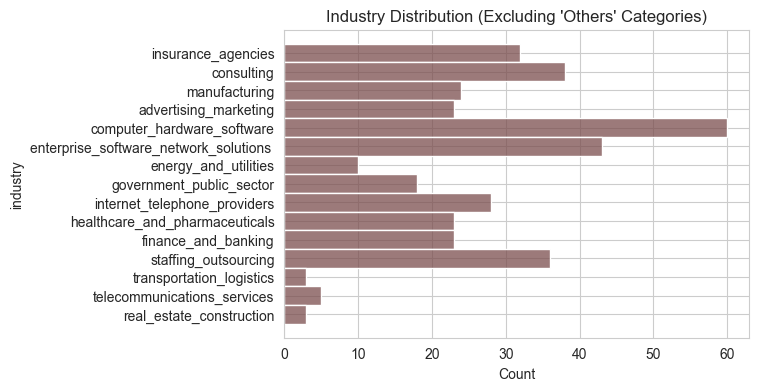

In [90]:
#filtering the non relevant data
relevant_df_industry =  df_final[ df_final['industry'] != 'others']

#setting the style
sns.set_palette("pink")
sns.set_style("whitegrid")

#plotting
plt.figure(figsize=(6, 4))
sns.histplot(data=relevant_df_industry, y='industry')
plt.title("Industry Distribution (Excluding 'Others' Categories)")
plt.show()

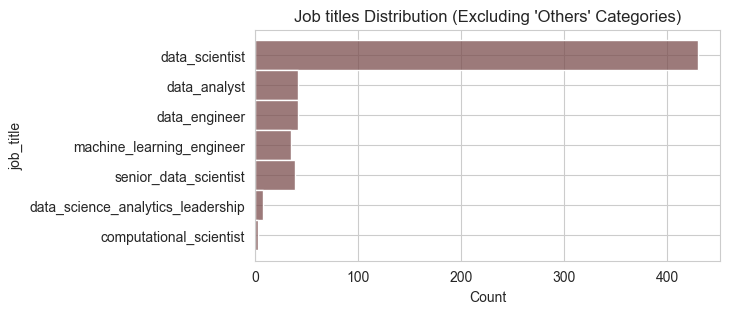

In [91]:
relevant_job =  df_final[ df_final['job_title'] != 'others']

plt.figure(figsize=(6, 3))
sns.histplot(data=relevant_job, y='job_title')
plt.title("Job titles Distribution (Excluding 'Others' Categories)")
plt.show()

<Figure size 2000x2000 with 0 Axes>

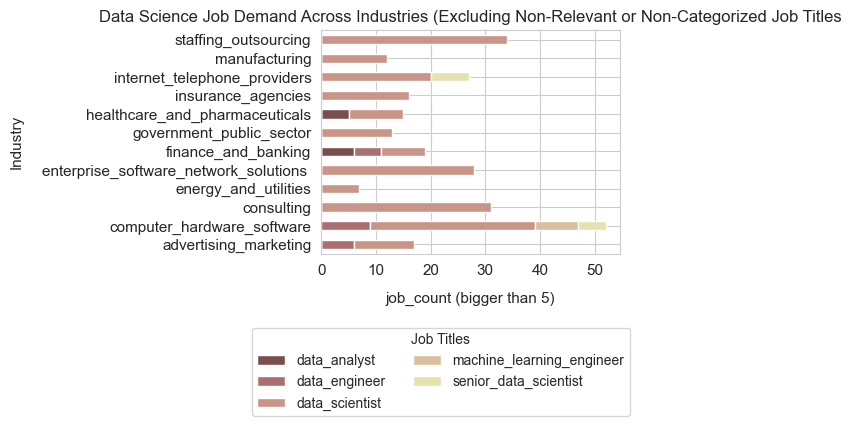

In [92]:

# groupping, excluding the non-relevant values and filtering the job counts less than 5
relevand_df_jobtitle_industry=relevant_df_industry[relevant_df_industry['job_title']!='others']
relevand_df_jobtitle_industry.groupby('industry')['job_title'].value_counts().reset_index(name='job_count (bigger than 5)').sort_values(by='job_count (bigger than 5)',ascending=False)
df_job_industy= relevand_df_jobtitle_industry.groupby('industry')['job_title'].value_counts().reset_index(name='job_count (bigger than 5)').sort_values(by='job_count (bigger than 5)',ascending=False)
df_job_industy=df_job_industy[df_job_industy['job_count (bigger than 5)']>=5].reset_index().drop(columns='index')

# Ploting the information 
plt.figure(figsize=(20, 20)) #  I couldn't figure out what it does not change the size of the figure

# Pivoting: job_titles as columns and industries as rows
pivot_df = df_job_industy.pivot(index='industry', columns='job_title', values='job_count (bigger than 5)')

# Plot
pivot_df.plot(kind='barh', stacked=True, fontsize=11)  # Adjust font size
plt.xlabel('job_count (bigger than 5)', fontsize=11,labelpad=10)  # Adjust font size
plt.ylabel('Industry', fontsize=11,labelpad=13)  # Adjust font size
plt.title('Data Science Job Demand Across Industries (Excluding Non-Relevant or Non-Categorized Job Titles', fontsize=12)  # Adjust font size
plt.legend(title='Job Titles', loc='upper center', bbox_to_anchor =(0.4, -0.3), ncol=2, fontsize=10)  
#plt.legend(title='Job Title', bbox_to_anchor=(1.05,0), loc='upper left')
#bbox_to_anchor=(0.4, -0.2)
# Adjust font size
plt.tight_layout()
plt.show()

Staffing and outsourcing firms exhibiting the highest demand for data scientists (34), followed closely by consulting (31) and computer hardware & software industries (30).Data engineers and Machine learning engineers  on the other hand, are in high demand in computer hardware and software industries(9 and 8 repectively).<br>For  data analysts, the consulting industry has the highest demand (5), followed by finance and banking (5) and healthcare and pharmaceuticals (5).


#
#### 2- Do company size and revenue levels influence salary estimations among the companies in the dataset?

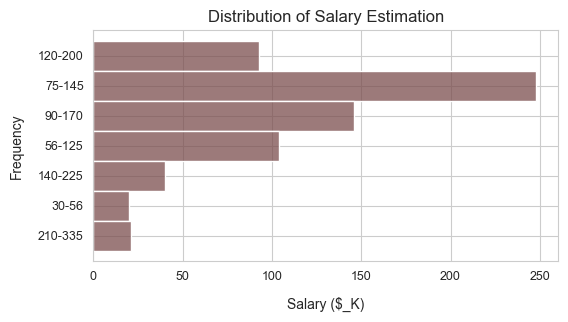

In [93]:
#plot adjustments, size and colurs 

plt.figure(figsize=(6,3))
sns.histplot(data=df_final, y='salary_$_K')
plt.title('Distribution of Salary Estimation',fontsize=12)
#axis_lables size and distance
plt.xlabel('Salary ($_K)', fontsize=10, labelpad=10) 
plt.ylabel('Frequency', fontsize=10, labelpad=10)
#lables fonts 
plt.xticks(fontsize=9)  
plt.yticks(fontsize=9) 
plt.show()

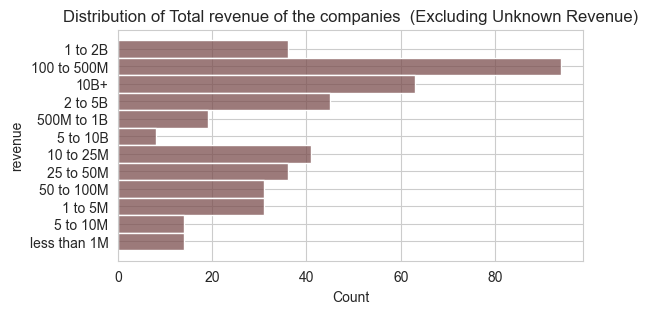

In [94]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df_final[df_final.revenue != 'unknown_non_applicable'], y='revenue')
plt.title('Distribution of Total revenue of the companies  (Excluding Unknown Revenue)')
plt.show()

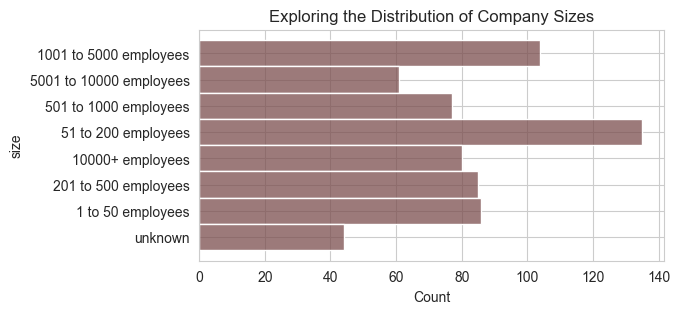

In [95]:
plt.figure(figsize=(6,3))
sns.histplot(data=df_final, y='size')
plt.title('Exploring the Distribution of Company Sizes')
plt.show()

In [96]:
# Filtering the columns
col_sal_revenue=['salary_$_K','revenue']
df_sal_revenue=df_final[col_sal_revenue]

# Filtering out rows with revenue 'unknown_non_applicable'
df_sal_revenue =  df_sal_revenue[ df_sal_revenue['revenue'] != 'unknown_non_applicable']
# Grouping
df_sal_revenue = df_sal_revenue.groupby(['salary_$_K', 'revenue']).count().reset_index()
# Sorting based on the sallaries lower range
#display(df_size_sal2)
df_sal_revenue['salary_sorted'] = df_sal_revenue['salary_$_K'].apply(lambda x: int(x.split('-')[0]))
df_sal_revenue= df_sal_revenue.sort_values(by=['revenue','salary_sorted'], ascending=[False, False])
df_sal_revenue2 = df_sal_revenue.reset_index(drop=True).drop(columns=['salary_sorted'])
df_sal_revenue3= df_sal_revenue.sort_values(by=['salary_sorted','revenue'], ascending=[False, False]).drop(columns=['salary_sorted'])
print('\nSorting the groupped data frist based on the salaries and then the revenues, excluding the unknown and non_applicable\n')
display(df_sal_revenue3)
print('\nSorting based on the revenue and then the salaries, excluding the unknown and non_applicable\n')
display(df_sal_revenue2)



Sorting the groupped data frist based on the salaries and then the revenues, excluding the unknown and non_applicable



,salary_$_K,revenue
28,210-335,less than 1M
27,210-335,500M to 1B
26,210-335,5 to 10M
25,210-335,25 to 50M
24,210-335,2 to 5B
...,...,...
33,30-56,10B+
32,30-56,100 to 500M
31,30-56,10 to 25M
30,30-56,1 to 5M



Sorting based on the revenue and then the salaries, excluding the unknown and non_applicable



,salary_$_K,revenue
0,210-335,less than 1M
1,120-200,less than 1M
2,90-170,less than 1M
3,75-145,less than 1M
4,56-125,less than 1M
...,...,...
68,120-200,1 to 2B
69,90-170,1 to 2B
70,75-145,1 to 2B
71,56-125,1 to 2B


In [97]:
# filtering based on columns
col_sal_size_revenue=['salary_$_K', 'size','revenue']
df_size_sal=df_final[col_sal_size_revenue]

# Filtering out rows with revenue 'unknown_non_applicable'
df_size_sal =  df_size_sal[ df_size_sal['revenue'] != 'unknown_non_applicable']
# Grouping
df_size_sal = df_size_sal.groupby(['salary_$_K', 'revenue'])['size'].count().reset_index(name='size_count')
df_size_sal.reset_index().drop(columns='index')

# Sorting based on the sallaries based on index0 (lower range in the estimation)
df_size_sal2 = df_size_sal.copy()
df_size_sal2['salary_sorted'] = df_size_sal2['salary_$_K'].apply(lambda x: int(x.split('-')[0]))
df_size_sal2 = df_size_sal2.sort_values(by=['size_count'], ascending= False).drop(columns=['salary_sorted'])
df_size_sal2 = df_size_sal2.reset_index(drop=True)
display(df_size_sal2)


,salary_$_K,revenue,size_count
0,75-145,100 to 500M,26
1,75-145,10 to 25M,21
2,75-145,10B+,21
3,90-170,100 to 500M,20
4,56-125,100 to 500M,19
...,...,...,...
68,30-56,1 to 5M,1
69,30-56,10 to 25M,1
70,30-56,10B+,1
71,56-125,5 to 10B,1


<Figure size 1000x1000 with 0 Axes>

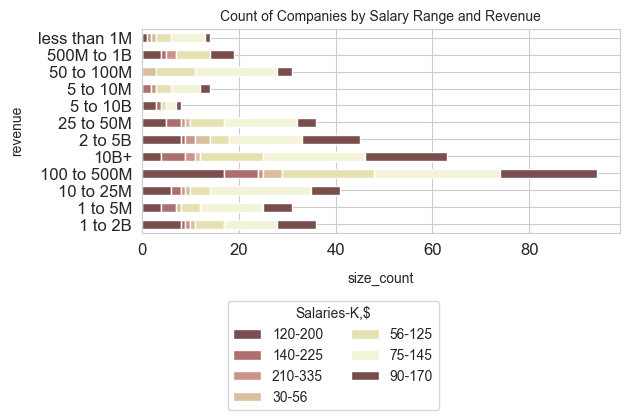

In [98]:
plt.figure(figsize=(10, 10))

# Pivoting the DataFrame to have job_titles as columns and industries as rows
#df_size_sal = df_size_sal.groupby(['salary_$_K', 'revenue'])['size'].count().reset_index(name='size_count')

pivot_df_sal = df_size_sal2.pivot(index='revenue', columns='salary_$_K', values='size_count')

# Plot the data
pivot_df_sal.plot(kind='barh', stacked=True, fontsize=12)  # Adjust font size
plt.xlabel('size_count', fontsize=10,labelpad=10)  # Adjust font size
plt.ylabel('revenue', fontsize=10,labelpad=10)  # Adjust font size
plt.title('Count of Companies by Salary Range and Revenue', fontsize=10)  # Adjust font size
plt.legend(title='Salaries-K,$', loc='upper center', bbox_to_anchor =(0.4, -0.3), ncol=2, fontsize=10)  
plt.tight_layout()
plt.show()

Distribution of Salaries: the salary range of 75-145K has the highest frequency (248 companies), indicating a significant portion of the companies offers salaries within this range and it has a more significant impact on the overall analysis of salary-related trends. This salary range is in high demand across different revenue categories, with 26 companies in the revenue range of 100 to 500 million, 21 companies each in the revenue ranges of 10 to 25 million and 10 billion or more, respectively.While this range is the most popular other salary ranges may have varying levels of demand depending on the revenue category.
At the extremes of the salary scale, particularly in the lower salary range of 30-56K and the higher salary range of 210-335K, there is limited demand across different revenue categories. This suggests that companies may be less inclined to offer salaries at these extremes, possibly due to budget constraints( higher range), the atractiveness of the job offer (lower range) or other factors.
While salary and revenue may influence each other to some extent, the analysis underscores the importance of considering both factors independently when evaluating job market trends.
Overall, the analysis highlights the interplay between salary and revenue in shaping job market dynamics, with certain salary ranges experiencing higher demand across various revenue categories. Understanding these trends can provide valuable insights for companies, job seekers, and policymakers in navigating the labor market effectively.

#
#### 3- Are there geographic regions where the open positions are more prevalent?

In [99]:
df_location = df_final.groupby(['location'])['size'].count().reset_index(name='companies in each location').sort_values(by='companies in each location', ascending=False)
display(df_location )

,location,companies in each location
162,"san francisco, ca",69
119,"new york, ny",50
194,"washington, dc",26
19,"boston, ma",24
37,"chicago, il",22
...,...,...
68,"fremont, ca",1
126,"oakville, ca",1
69,"gahanna, oh",1
71,"germantown, md",1


In [100]:
df_location = df_final.groupby(['headquarters'])['size'].count().reset_index(name='headquarters in each location').sort_values(by='headquarters in each location', ascending=False)
display(df_location )

,headquarters,headquarters in each location
142,"new york, ny",33
137,nan,31
178,"san francisco, ca",31
46,"chicago, il",23
27,"boston, ma",19
...,...,...
93,"holyoke, ma",1
94,"honolulu, hi",1
98,"ipswich, ma",1
100,"irving, tx",1


In [101]:
df_location_head = df_final.groupby(['location','headquarters'])['size'].count().reset_index(name='companies in each location').sort_values(by='companies in each location', ascending=False)
#df_size_sal = df_size_sal.groupby(['salary_$_K', 'revenue'])['size'].count().reset_index(name='size_count').sort_values(by='salary_$_K', ascending=False)
display(df_location_head )

,location,headquarters,companies in each location
291,"san francisco, ca","san francisco, ca",25
199,"new york, ny","new york, ny",22
33,"boston, ma","boston, ma",16
287,"san francisco, ca",nan,16
69,"chicago, il","chicago, il",14
...,...,...,...
80,"colorado springs, co","los angeles, ca",1
213,"norwell, ma","columbus, oh",1
79,"collegeville, pa","brentford, united kingdom",1
215,"oakland, ca","santa ana, ca",1


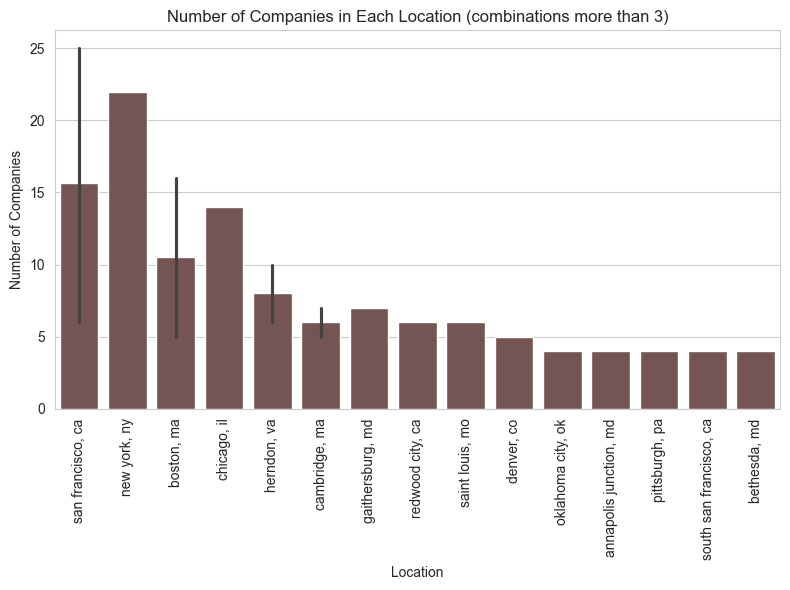

In [102]:
# filtered DataFrame >3
df_filtered_locations = df_location_head[df_location_head['companies in each location'] > 3]

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=df_filtered_locations, x='location', y='companies in each location')
plt.xlabel('Location')
plt.ylabel('Number of Companies')
plt.title('Number of Companies in Each Location (combinations more than 3)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Locations like San Francisco, CA, and New York, NY, exhibit high concentrations of companies, with 69 and 50 companies respectively. Other major locations include Washington, DC, Boston, MA, and Chicago, IL, each with a substantial number of companies.
New York, NY, and San Francisco, CA, emerge as major hubs for company headquarters, with 33 and 31 headquarters respectively.
Other significant locations for headquarters include Chicago, IL, Boston, MA, and several others.
It also reveals that major cities like San Francisco, CA, New York, NY, and Boston, MA, serve as prominent centers for both company operations and headquarters. While certain locations have a high concentration of companies, there are variations in the distribution of headquarters, indicating diverse organizational structures and strategic decisions.
By identifying regions where companies operate and where their headquarters are situated, the analysis offers insights into geographic regions with higher job prevalence.

### Conclusion 

Based on the analysis conducted, the following conclusions can be drawn:
High Demand Industries and Job Titles: The analysis indicates that industries such as 'Computer Hardware & Software', 'Enterprise Software & Network Solutions', and 'Consulting' have a high demand for data science roles. The most common job titles required include 'Data Scientist', 'Data Analyst', and 'Data Engineer', with staffing and outsourcing firms exhibiting the highest demand for data scientists.<br>
Impact of Company Size and Revenue on Salary Estimations: The distribution of salaries reveals that the range of 75-145K is the most prevalent, indicating significant demand within this range across different revenue categories. Salary ranges at the extremes, such as 30-56K and 210-335K, show limited demand, possibly influenced by budget constraints or other factors. While there may be some influence between salary and revenue, both factors should be considered independently when evaluating job market trends.<br>
Prevalence of Open Positions in Geographic Regions: Major cities like San Francisco, CA, New York, NY, and Boston, MA, emerge as prominent centers for open positions, with high concentrations of companies and headquarters. While certain locations have a higher concentration of companies, variations in the distribution of headquarters indicate diverse organizational structures and strategic decisions.<br>
In summary, the analysis provides insights into the industries, job titles, salary estimations, and geographic regions with higher job prevalence, offering valuable information for companies, job seekers, and policymakers in understanding and navigating the labor market effectively.

In [103]:
df_final.to_csv('final_data.csv', index=False)

In [ ]:
if__name__=="__main__":
    general_cleaning(df)
    cleaning_job_title(job_title)
    cleaning_industry(industry)
    cleaning_salary(salary)
    cleaning_locations(location)
    cleaning_headquarters(location)
    cleaning_companies(company)